<a href="https://colab.research.google.com/github/AleksDec/programming-languages-analysis/blob/main/programming_languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><font color=D0C9C0>Popularity analysis of different programming languages over time</h2>

In [ ]:
import pandas as pd
df = pd.read_csv("QueryResults.csv")

In [ ]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [ ]:
df.columns=["DATE", "NAME", "POSTS"]

In [ ]:
df.head()

,DATE,NAME,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [ ]:
df.DATE[1]

'2008-08-01 00:00:00'

In [ ]:
df.DATE = pd.to_datetime(df.DATE)

In [ ]:
df.head()

,DATE,NAME,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [ ]:
type(df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.groupby('NAME').sum()

,POSTS
NAME,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [ ]:
reshaped_df = df.pivot(index='DATE', columns='NAME', values='POSTS')
reshaped_df.head()

NAME,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [ ]:
reshaped_df.fillna(0, inplace=True)

In [ ]:
reshaped_df.head()

NAME,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [ ]:
reshaped_df.isna().values.any()

False

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
java_df = df.fillna(0)
java_df = java_df[java_df.NAME == 'java']
java_df

,DATE,NAME,POSTS
8,2008-08-01,java,222
16,2008-09-01,java,1137
25,2008-10-01,java,1153
39,2008-11-01,java,958
51,2008-12-01,java,832
...,...,...,...
1921,2020-03-01,java,13253
1935,2020-04-01,java,15377
1949,2020-05-01,java,14711
1964,2020-06-01,java,13015


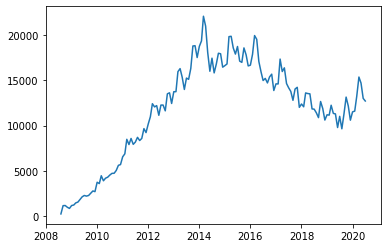

In [ ]:
plt.plot(java_df.DATE, java_df.POSTS);

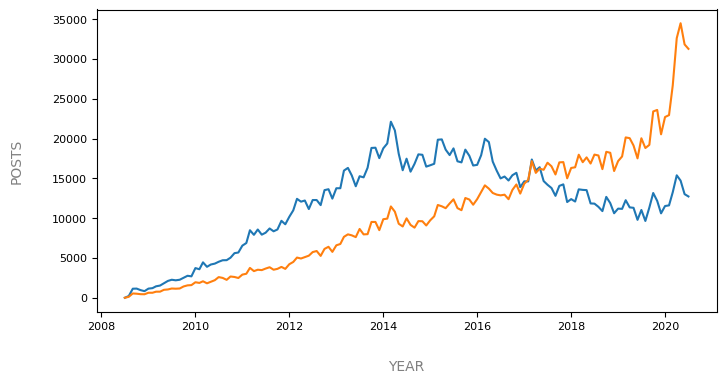

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot(reshaped_df.index,reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)
plt.xlabel('YEAR', labelpad=20, color='gray')
plt.ylabel('POSTS', labelpad=20, color='gray')
plt.xticks(fontsize=8);
plt.yticks(fontsize=8);

In [ ]:
reshaped_df.head()

NAME,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


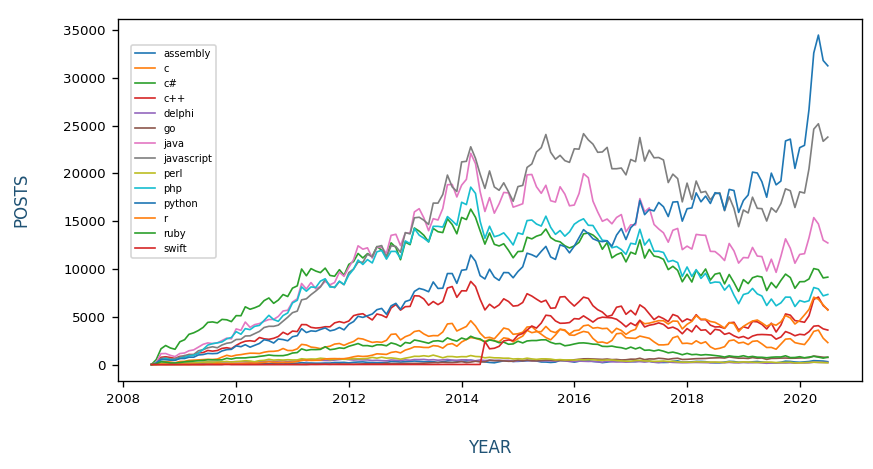

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
for name in reshaped_df.columns:
  plt.plot(reshaped_df.index,reshaped_df[name], linewidth=1)
plt.xlabel('YEAR', labelpad=20, color='#205375')
plt.ylabel('POSTS', labelpad=20, color='#205375')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.figlegend(reshaped_df.columns, loc=(0.15,0.45), fontsize=6)
plt.show()

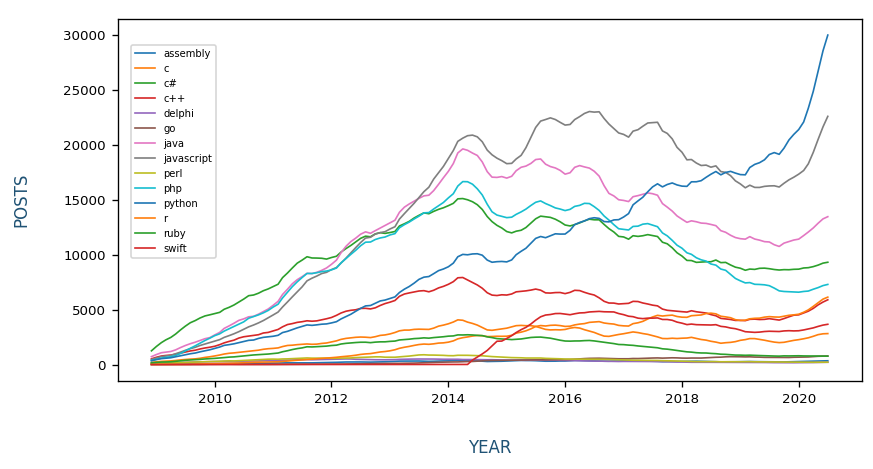

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(8,4), dpi=120)

for name in roll_df.columns:
  plt.plot(roll_df.index, roll_df[name], linewidth=1)

plt.xlabel('YEAR', labelpad=20, color='#205375')
plt.ylabel('POSTS', labelpad=20, color='#205375')
plt.xticks(fontsize=8);
plt.yticks(fontsize=8);
plt.figlegend(reshaped_df.columns, loc=(0.15,0.45), fontsize=6)
plt.show()

In [ ]:
df.DATE = [df.DATE[i].year for i in range(len(df))]

In [ ]:
df_08_12 = df[(df.DATE >= 2008) & (df.DATE < 2012)]

In [ ]:
df_08_12.groupby('NAME').sum().sort_values('POSTS', ascending=False)

,DATE,POSTS
NAME,,
c#,84408,241756
java,82400,181636
php,82400,170448
javascript,82400,154863
c++,82400,98739
python,82400,84153
c,82400,45804
ruby,82400,35049
perl,82400,14977


In [ ]:
df_15_18 = df[(df.DATE >= 2015) & (df.DATE < 2018)]
df_15_18.groupby('NAME').sum().sort_values('POSTS', ascending=False)

,DATE,POSTS
NAME,,
javascript,72576,770815
java,72576,587506
python,72576,488296
php,72576,475580
c#,72576,436187
c++,72576,213642
swift,72576,154934
r,72576,136142
c,72576,105368


In [ ]:
df[df['DATE'] == 2020].sort_values('POSTS', ascending=False)

,DATE,NAME,POSTS
1958,2020,python,34478
1946,2020,python,32605
1973,2020,python,31817
1984,2020,python,31261
1926,2020,python,26673
...,...,...,...
1989,2020,perl,182
1924,2020,delphi,181
1898,2020,delphi,178
1899,2020,perl,174
